In [2]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import pandas as pd
import cartopy.mpl.ticker as cticker
from matplotlib.animation import FuncAnimation
#import imageio.v2 as imageio
import math 

In [3]:
file1 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'     #SSP534
#file1 = '/cluster/projects/nn9576k/anusha/DATA/landuse.timeseries_1.9x2.5_SSP4-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'  #SSP434
dset1 = xr.open_dataset(file1, decode_times=False)
dset1 = dset1.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset1=dset1.assign_coords(Latitude=dset1['LATIXY'][:,0].values)
dset1=dset1.assign_coords(Longitude=dset1['LONGXY'][0,:].values)

file3 = '/cluster/shared/noresm/inputdata/mdeb/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_sugarcane.nc'     #modified from Matvey for sugarcane
dset3 = xr.open_dataset(file3, decode_times=False)
dset3 = dset3.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset3=dset3.assign_coords(Latitude=dset3['LATIXY'][:,0].values)
dset3=dset3.assign_coords(Longitude=dset3['LONGXY'][0,:].values)
dset1['PCT_CFT_area'] =(dset1['PCT_CFT']/100)*dset1['AREA']*(dset1['PCT_CROP']/100)* dset1['LANDFRAC_PFT']
dset3['PCT_CFT_area'] =(dset3['PCT_CFT']/100)*dset3['AREA']*(dset3['PCT_CROP']/100)* dset3['LANDFRAC_PFT']

cane = [67,68]
dataorig_sugarcane=dset1['PCT_CFT_area'].sel(time=2100).sel(cft=cane).sum('cft')
datamod_sugarcane=dset3['PCT_CFT_area'].sel(time=2100).sel(cft=cane).sum('cft')

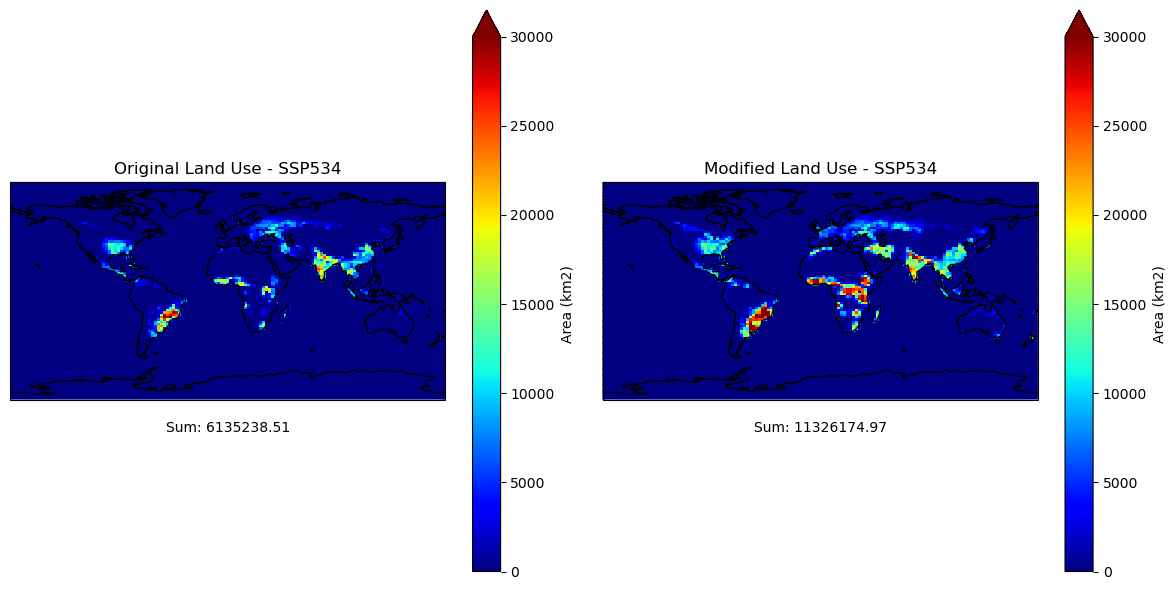

In [6]:

# Plot original land use
fig, axs = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
dataorig_sugarcane.plot(ax=axs[0], cmap='jet', cbar_kwargs={'label': 'Area (km2)'},vmax=30000)
axs[0].coastlines()
axs[0].set_title('Original Land Use - SSP534')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

# Plot modified land use
datamod_sugarcane.plot(ax=axs[1], cmap='jet', cbar_kwargs={'label': 'Area (km2)'},vmax=30000)
axs[1].coastlines()
axs[1].set_title('Modified Land Use - SSP534')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')

# Calculate and display the sum below the plots
sum_orig = dataorig_sugarcane.sum().values
sum_mod = datamod_sugarcane.sum().values

axs[0].text(0.5, -0.15, f'Sum: {sum_orig:.2f}', horizontalalignment='center', transform=axs[0].transAxes)
axs[1].text(0.5, -0.15, f'Sum: {sum_mod:.2f}', horizontalalignment='center', transform=axs[1].transAxes)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

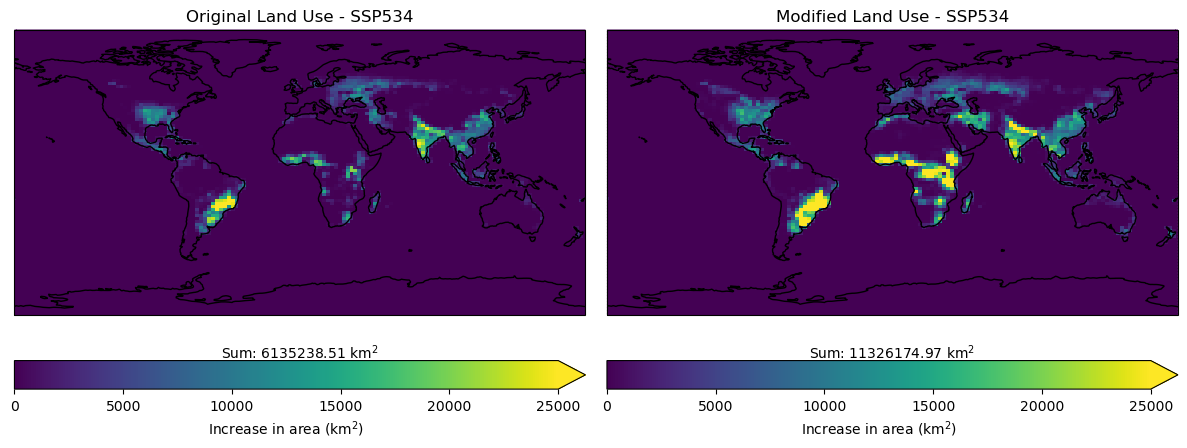

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Plot original land use
fig, axs = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
orig_plot = dataorig_sugarcane.plot(ax=axs[0], cmap='viridis', cbar_kwargs={'label': 'Increase in area (km$^2$)', 'orientation': 'horizontal', 'pad': 0.08}, vmax=25000)
axs[0].coastlines()
axs[0].set_title('Original Land Use - SSP534')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

# Plot modified land use
mod_plot = datamod_sugarcane.plot(ax=axs[1], cmap='viridis', cbar_kwargs={'label': 'Increase in area (km$^2$)', 'orientation': 'horizontal', 'pad': 0.08}, vmax=25000)
axs[1].coastlines()
axs[1].set_title('Modified Land Use - SSP534')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')

# Calculate and display the sum below the plots
sum_orig = dataorig_sugarcane.sum().values
sum_mod = datamod_sugarcane.sum().values

axs[0].text(0.5, -0.15, f'Sum: {sum_orig:.2f} km$^2$', horizontalalignment='center', transform=axs[0].transAxes)
axs[1].text(0.5, -0.15, f'Sum: {sum_mod:.2f} km$^2$', horizontalalignment='center', transform=axs[1].transAxes)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


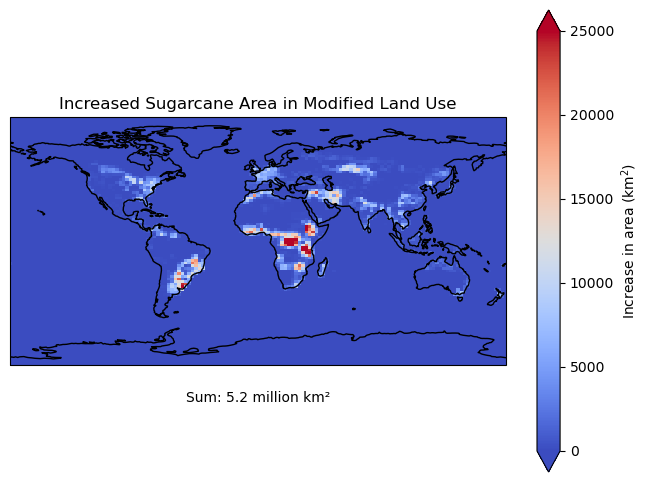

In [8]:
diff=datamod_sugarcane-dataorig_sugarcane

# Plot the difference with vmin set to zero
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
diff.plot(ax=ax, cmap='coolwarm', cbar_kwargs={'label': 'Increase in area (km$^2$)'}, vmin=0, vmax=25000)
ax.coastlines()

# Add gridlines with labels for latitude and longitude
#ax.gridlines(draw_labels=True)

# Add title and axis labels
ax.set_title('Increased Sugarcane Area in Modified Land Use')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Calculate and display the sum below the plot
sum_diff = diff.sum().values
formatted_sum = f'{sum_diff / 1_000_000:.1f} million km²'
#ax.text(0.5, -0.15, f'Sum: {sum_diff:.2f} km$^2$', horizontalalignment='center', transform=ax.transAxes)
ax.text(0.5, -0.15, f'Sum: {formatted_sum}', horizontalalignment='center', transform=ax.transAxes)


# Show the plot
plt.show()



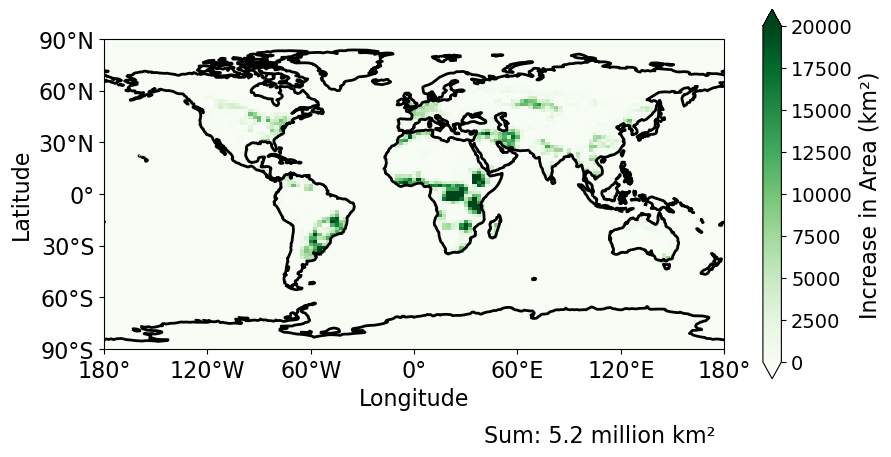

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
file1 = '/cluster/projects/nn9576k/anusha/DATA/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'     #SSP534
#file1 = '/cluster/projects/nn9576k/anusha/DATA/landuse.timeseries_1.9x2.5_SSP4-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'  #SSP434
dset1 = xr.open_dataset(file1, decode_times=False)
dset1 = dset1.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset1=dset1.assign_coords(Latitude=dset1['LATIXY'][:,0].values)
dset1=dset1.assign_coords(Longitude=dset1['LONGXY'][0,:].values)

file3 = '/cluster/projects/nn9576k/anusha/DATA/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_sugarcane.nc'     #modified from Matvey for sugarcane
dset3 = xr.open_dataset(file3, decode_times=False)
dset3 = dset3.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset3=dset3.assign_coords(Latitude=dset3['LATIXY'][:,0].values)
dset3=dset3.assign_coords(Longitude=dset3['LONGXY'][0,:].values)
dset1['PCT_CFT_area'] =(dset1['PCT_CFT']/100)*dset1['AREA']*(dset1['PCT_CROP']/100)* dset1['LANDFRAC_PFT']
dset3['PCT_CFT_area'] =(dset3['PCT_CFT']/100)*dset3['AREA']*(dset3['PCT_CROP']/100)* dset3['LANDFRAC_PFT']

cane = [67,68]
dataorig_sugarcane=dset1['PCT_CFT_area'].sel(time=2100).sel(cft=cane).sum('cft')
datamod_sugarcane=dset3['PCT_CFT_area'].sel(time=2100).sel(cft=cane).sum('cft')

diff=datamod_sugarcane-dataorig_sugarcane
# Plot the difference with vmin set to zero
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
#diff.plot(ax=ax, cmap='Greens', cbar_kwargs={'label': 'Increase in Area (km2)' , 'shrink': 0.8}, vmin=0,vmax=25000)
diff_plot = diff.plot(ax=ax, cmap='Greens', cbar_kwargs={'label': 'Increase in Area (km²)', 'shrink': 0.8}, vmin=0, vmax=20000, add_labels=False)

ax.coastlines(linewidth=2)

# Adjust colorbar label and tick font sizes
cbar = diff_plot.colorbar
cbar.ax.tick_params(labelsize=14)  # Increase font size for colorbar ticks
cbar.set_label('Increase in Area (km²)', fontsize=16)  
# Add gridlines for latitude and longitude


# Set labels and title
#ax.set_title('Increased Sugarcane area in Modified Land Use', fontsize=16)
ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.xaxis.set_tick_params(labelsize=16) 
ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.yaxis.set_tick_params(labelsize=16)  
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
# Calculate and display the sum below the plot
sum_diff = diff.sum().values
formatted_sum = f'{sum_diff / 1_000_000:.1f} million km²'
#ax.text(0.5, -0.15, f'Sum: {sum_diff:.2f} km$^2$', horizontalalignment='center', transform=ax.transAxes)
ax.text(0.8, -0.3, f'Sum: {formatted_sum}', horizontalalignment='center', transform=ax.transAxes, fontsize=16)
plt.savefig('AdditionalSugarcanearea.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


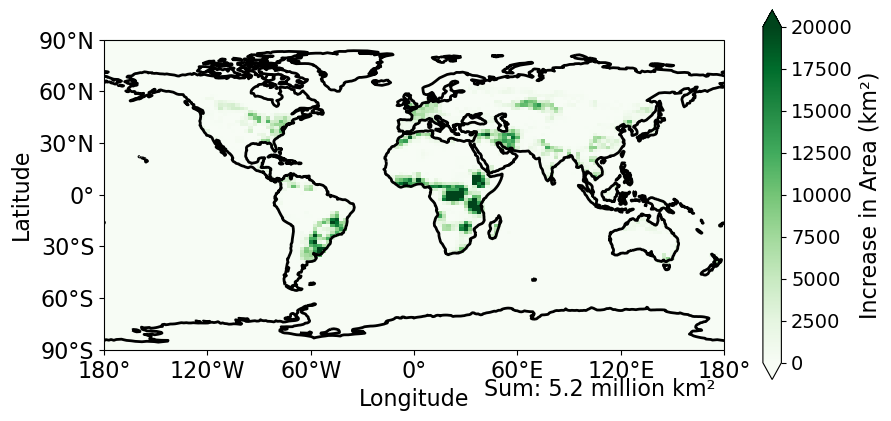

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import numpy as np

# Plot the difference with vmin set to zero
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the difference with colorbar and specified range, disabling the automatic title
diff_plot = diff.plot(
    ax=ax,
    cmap='Greens',
    cbar_kwargs={'label': 'Increase in Area (km²)', 'shrink': 0.8},
    vmin=0,
    vmax=20000,
    add_colorbar=True,  # Ensure the colorbar is added
    add_labels=False,   # Disable automatic labels
)

# Add coastlines
ax.coastlines(linewidth=2)

# Customize colorbar
cbar = diff_plot.colorbar
cbar.ax.tick_params(labelsize=14)  # Increase font size for colorbar ticks
cbar.set_label('Increase in Area (km²)', fontsize=16)

# Add gridlines for latitude and longitude
ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.xaxis.set_tick_params(labelsize=16)
ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.yaxis.set_tick_params(labelsize=16)

# Set axis labels
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)

# Calculate and display the sum below the plot
sum_diff = diff.sum().values
formatted_sum = f'{sum_diff / 1_000_000:.1f} million km²'
ax.text(0.8, -0.15, f'Sum: {formatted_sum}', horizontalalignment='center', transform=ax.transAxes, fontsize=16)

# Save the figure
plt.savefig('AdditionalSugarcaneArea.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
